# DETECTION PHISHING WEBSITE

DESCRIPTION:  The technological advancement paved the way for the development of 
e-commerce sites and even most of the people started shopping online where they 
give their sensitive information like bank details, username, password, etc. 
Fraudsters used this opportunity and created fake sites that look similar to the 
original to collect sensitive user data.

In [51]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report,confusion_matrix

In [52]:
#importing the data
df=pd.read_csv("D:\Phishing.csv")
df           #printing the data

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www.askmen.com/sports/business/index.html,2008,0,1,9862,41,0,0,0,14,2,0


In [53]:
df.head(10)      # prints the first 5 rows of the data default and if we need more number of rows we can specify , 
                 #  as we can see that i have specified 10 .So it printed 10 rows

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1
5,diannaopeizhi.com/js/,10000000,0,1,1096,21,0,0,0,17,1,1
6,www.synchrotech.com/support/install.html,10000000,0,1,12053,40,0,0,0,19,2,0
7,www.ansi.okstate.edu/breeds/swine/largeblackwh...,23191,0,0,0,50,0,0,0,20,3,0
8,www.strum.co.uk/webbery/,10000000,0,0,0,24,0,0,0,15,3,0
9,www.grok2.com/vi-emacs.html,10000000,0,1,6210,27,0,0,0,13,2,0


In [54]:
df.shape        #prints the number of rows and columns in our dataset

(95910, 12)

# Data Preprocessing

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


In [56]:
df.columns

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')

In [57]:
df.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


In [58]:
df.isnull().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

Therefore there are no null values .

# Data Visualization

Total no.of Rankings are:  5259


<AxesSubplot:xlabel='ranking', ylabel='Count'>

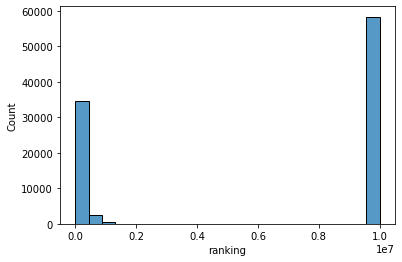

In [59]:
import seaborn as sns
print("Total no.of Rankings are: ",len(df['ranking'].unique()))
sns.histplot(df['ranking'])

Distribution of having and not having IP address
No.of links having IP address and not having are 22 , 95888 respectively


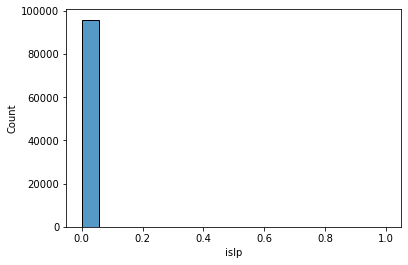

In [60]:
print("Distribution of having and not having IP address")
sns.histplot(df['isIp'])
print("No.of links having IP address and not having are {} , {} respectively".format(len(df[df['isIp']==1]),len(df[df['isIp']==0])))

Distribution of valid and invalid registration
No.of links having valid registration and not having are 55042 , 40868 respectively


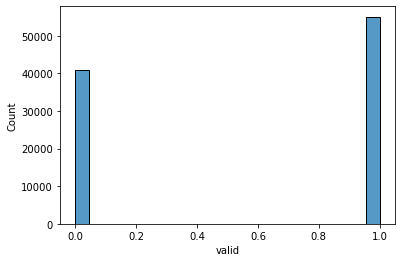

In [61]:
print("Distribution of valid and invalid registration")
sns.histplot(df['valid'])
print("No.of links having valid registration and not having are {} , {} respectively".format(len(df[df['valid']==1]),len(df[df['valid']==0])))

Duration of activeness since registration


<AxesSubplot:xlabel='activeDuration', ylabel='Count'>

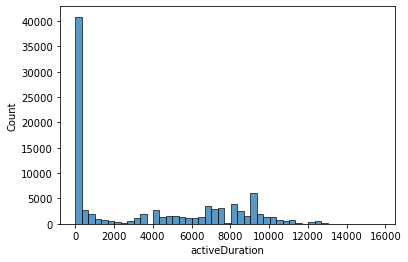

In [62]:
print("Duration of activeness since registration")
sns.histplot(df['activeDuration'])

Length of URL


<AxesSubplot:xlabel='urlLen', ylabel='Count'>

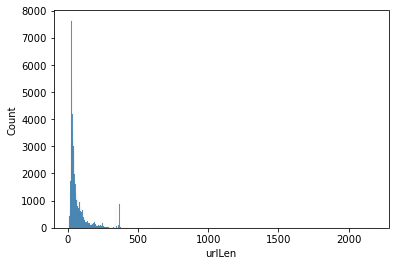

In [63]:
print("Length of URL")
sns.histplot(df['urlLen'])

Links which have @ character


<AxesSubplot:xlabel='is@', ylabel='Count'>

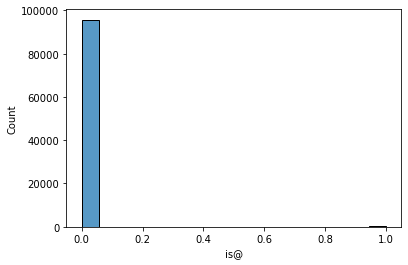

In [64]:
print("Links which have @ character")
sns.histplot(df['is@'])

URL having redirecting


<AxesSubplot:xlabel='isredirect', ylabel='Count'>

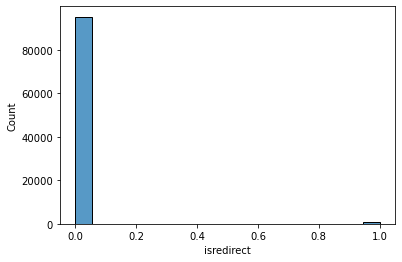

In [65]:
print("URL having redirecting")
sns.histplot(df['isredirect'])

Having dashes in domain name


<AxesSubplot:xlabel='haveDash', ylabel='Count'>

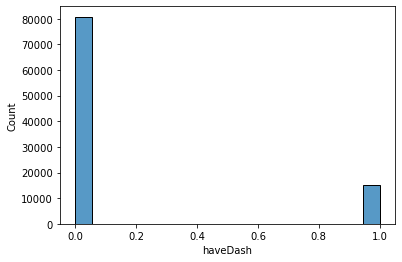

In [66]:
print("Having dashes in domain name")
sns.histplot(df['haveDash'])

The length of just the domain name.


<AxesSubplot:xlabel='domainLen', ylabel='Count'>

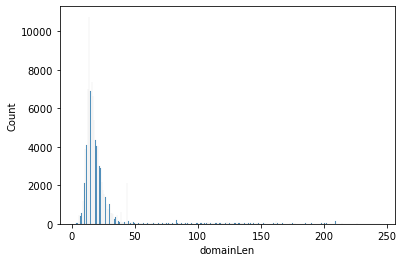

In [67]:
print("The length of just the domain name.")
sns.histplot(df['domainLen'])

The number of subdomains preset in the URL


<AxesSubplot:xlabel='nosOfSubdomain', ylabel='Count'>

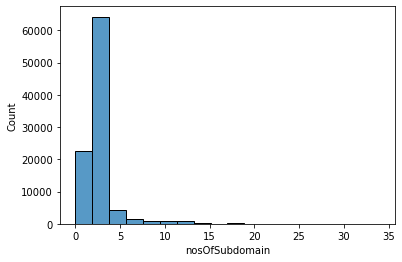

In [68]:
print("The number of subdomains preset in the URL")
sns.histplot(df['nosOfSubdomain'])

Distribution of Legitimate(0) and Phishing websites(1) for given data


<AxesSubplot:xlabel='label', ylabel='Count'>

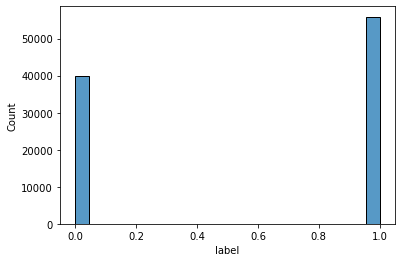

In [69]:
print("Distribution of Legitimate(0) and Phishing websites(1) for given data")
sns.histplot(df['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

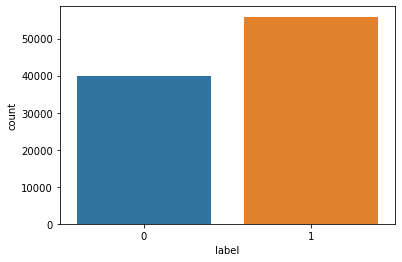

In [70]:
#counter plot
sns.countplot(x="label",data=df)

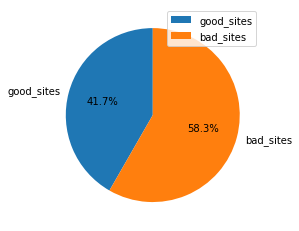

In [71]:
#piechart
import matplotlib.pyplot as plt
labels=['good_sites','bad_sites']
x=[39996, 55914]
fig = plt.figure(figsize =(10, 4))
plt.pie(x,labels=labels,autopct='%1.1f%%',startangle=90)
plt.legend()
plt.show()

In [72]:
#removing unimportant characters in 'domain'
import re
import string
chars = re.escape(string.punctuation)
newdomain=[]
for i in df['domain']:
    newdomain.append(re.sub(r'['+chars+']', ' ',i))
df['domain']=newdomain
df

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www voting yahoo com,10000000,0,0,0,20,0,0,1,20,2,1
1,www zvon org xxl WSDL1 1 Output index html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais com file security update infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima astro umd edu nemo linuxastro,7001,0,0,0,35,0,0,0,18,3,0
4,huarui tec com js us battle net login en ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,www freewebs com ryanrules2,5001,0,1,8035,28,0,0,0,16,2,0
95906,www ireland information com freecelticfonts htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www clubtaunus soroptimist de img pro e php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www askmen com sports business index html,2008,0,1,9862,41,0,0,0,14,2,0


In [73]:
## links we have
len(df['domain'].unique())

71675

In [74]:
#visualization of most frequent vs least words
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 
print(stopwords)
for val in df['domain']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

{'k', "they're", 'do', "we'd", 'for', "they've", 'does', "when's", 'can', "let's", 'at', 'ourselves', 'on', "i'm", 'same', 'did', 'so', 'own', 'no', "here's", 'again', 'while', "you'd", "you're", 'of', 'its', 'those', 'she', "shan't", 'ought', 'some', 'herself', 'you', 'an', 'his', 'few', 'more', 'yours', 'over', 'it', 'r', 'her', 'is', 'above', 'not', 'too', 'yourselves', 'why', 'their', "that's", 'who', "shouldn't", "weren't", 'myself', 'once', 'like', "didn't", 'was', 'further', 'under', 'being', 'between', "what's", 'any', 'very', "they'd", 'would', "there's", 'how', "haven't", 'he', 'were', 'him', 'yourself', 'else', 'with', 'our', 'through', 'below', 'had', "he's", 'have', 'them', "she's", 'we', 'both', "we're", 'than', "won't", 'ever', 'has', 'i', "i'd", 'only', 'such', 'but', 'these', 'http', 'from', 'because', 'also', 'up', 'theirs', 'before', 'other', 'just', 'out', 'which', 'where', "she'll", 'down', 'since', "aren't", 'this', 'my', 'could', 'otherwise', 'what', 'if', 'canno

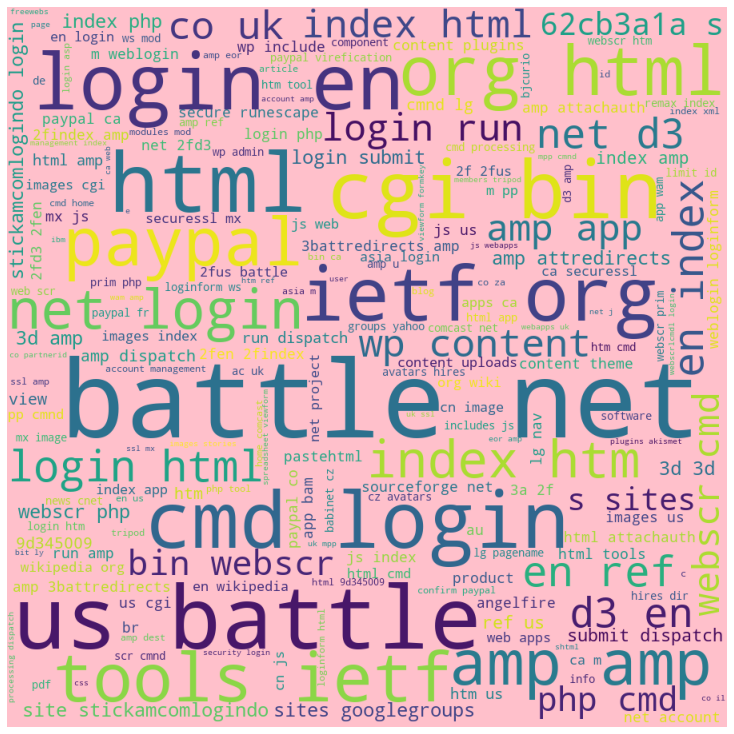

In [75]:
wordcloud = WordCloud(width = 900, height = 900, 
                background_color ='pink', 
                stopwords=stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [76]:
#Checking the distribution of data
print(df['label'].value_counts())

1    55914
0    39996
Name: label, dtype: int64


This tells us that the no.of legitimate website's are less than the number of phishing website's

In [77]:
#0 represents Legitimate website
#1 represents spam website/ phishing website
bad_sites = df[df.label == 1]
good_sites = df[df.label == 0]

In [78]:
good_sites.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
1,www zvon org xxl WSDL1 1 Output index html,194914,0,1,7305,42,0,0,0,12,2,0
3,bima astro umd edu nemo linuxastro,7001,0,0,0,35,0,0,0,18,3,0
6,www synchrotech com support install html,10000000,0,1,12053,40,0,0,0,19,2,0
7,www ansi okstate edu breeds swine largeblackwh...,23191,0,0,0,50,0,0,0,20,3,0
8,www strum co uk webbery,10000000,0,0,0,24,0,0,0,15,3,0


In [79]:
bad_sites.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www voting yahoo com,10000000,0,0,0,20,0,0,1,20,2,1
2,tecportais com file security update infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
4,huarui tec com js us battle net login en ref...,10000000,0,1,730,79,0,0,1,14,1,1
5,diannaopeizhi com js,10000000,0,1,1096,21,0,0,0,17,1,1
11,expertwear pk img glyph 1 beveilings online in...,10000000,0,0,0,54,0,0,0,13,1,1


In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['domain']=le.fit_transform(df['domain'])
df

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,67990,10000000,0,0,0,20,0,0,1,20,2,1
1,70076,194914,0,1,7305,42,0,0,0,12,2,0
2,32395,10000000,0,0,0,155,0,0,0,14,1,1
3,4831,7001,0,0,0,35,0,0,0,18,3,0
4,15260,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,50992,5001,0,1,8035,28,0,0,0,16,2,0
95906,54194,230251,0,1,8400,47,0,0,1,27,2,0
95907,45648,10000000,0,0,0,43,0,0,0,29,3,1
95908,42479,2008,0,1,9862,41,0,0,0,14,2,0


# Splitting the data into training and testing

In [81]:
X= df.drop(['label'], axis=1) 
y= df.label           

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)   # data is splitted in 60:40 ratio

In [83]:
print(X_train.shape)
print(X_test.shape)

(57546, 11)
(38364, 11)


# Heatmap

<AxesSubplot:>

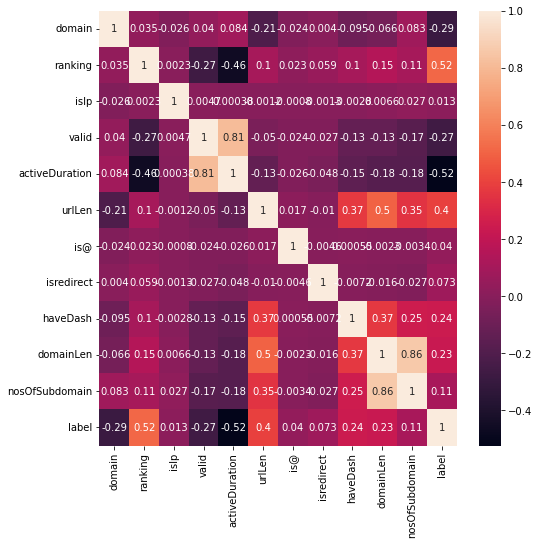

In [84]:
#heatmap
fig = plt.figure(figsize =(8,8))
sns.heatmap(df.corr(),annot=True)

# Logistic regression

Let's build Logistic regression model. First, import the LogisticRegression module and create lr object by passing arguments
Then, fit your model on train set using fit() and perform prediction on the test set using predict().
Let's estimate how accurately the classifier or model can predict the phishing website.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
lr=LogisticRegression(random_state= 0, multi_class='multinomial' , solver='newton-cg')   
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     16067
           1       0.88      0.88      0.88     22297

    accuracy                           0.86     38364
   macro avg       0.85      0.85      0.85     38364
weighted avg       0.86      0.86      0.86     38364



Therefore ,we can see that LOGISTIC REGRESSION has given  86%

In [86]:
x_predict = list(lr.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
84775,0,0
76416,0,0
30650,1,0
19839,0,1
90517,0,0
43254,0,0
70424,1,1
11128,0,0
65825,1,1
53407,1,1


we can also understand that the predicted values are not similar to the original values

# Random Forest

Let's random forest model. First, import the RandomForestClassifier and create rfc object by passing few arguments.
Then, fit your model on train set using fit() and perform prediction on the test set using predict().
Let's estimate how accurately the classifier or model can predict the phishing website.

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=450,max_depth =  14)
rfc.fit(X_train, y_train)
testpred_rfc = rfc.predict(X_test)
#rnd_score = rfc.score(X_test,y_test)
#print('score of model is : ',rnd_score)

In [88]:
print(classification_report(y_test, testpred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     16067
           1       0.96      0.97      0.96     22297

    accuracy                           0.96     38364
   macro avg       0.96      0.95      0.96     38364
weighted avg       0.96      0.96      0.96     38364



Therefore , we can see that randomforest classifier has given the highest accuracy ie.<96%> compared to logistic regression 
and support vector machine

In [91]:
trainpred=rfc.predict(X_train)
testpred_rfc = rfc.predict(X_test)
print("Testing accuracy Random Forest:",100*accuracy_score(testpred_rfc,y_test))
print("Training accuracy Random Forest:",100*accuracy_score(trainpred,y_train))

Testing accuracy Random Forest: 95.68345323741008
Training accuracy Random Forest: 97.0441038473569


In [92]:
x_predict = list(rfc.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
84775,0,0
76416,0,0
30650,0,0
19839,1,1
90517,0,0
43254,0,0
70424,1,1
11128,0,0
65825,1,1
53407,1,1


Therefore we , can understand that the predicted values and actual values are almost similar 

# Support Vector Machine

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.
Then, fit your model on train set using fit() and perform prediction on the test set using predict().
Let's estimate how accurately the classifier or model can predict the phishing website.

In [93]:
from sklearn.svm import SVC 

In [94]:
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report,confusion_matrix

In [95]:
svc = SVC()

In [96]:
svc.fit(X_train, y_train)

SVC()

In [97]:
pred_svc = svc.predict(X_test)

In [98]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71     16067
           1       0.79      0.82      0.80     22297

    accuracy                           0.77     38364
   macro avg       0.76      0.76      0.76     38364
weighted avg       0.77      0.77      0.77     38364



Therefore , we can see that support vector machine has given the  <77%> accuracy.

In [99]:
x_predict = list(svc.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
84775,0,0
76416,0,0
30650,1,0
19839,0,1
90517,0,0
43254,1,0
70424,1,1
11128,1,0
65825,1,1
53407,1,1


we can also understand that the predicted values are not similar to the original values in svm

Conclusion: Here,according to our output, we saw that the original testing values are as much similar to our RandomForestClassifier model predicted values. Random Forest Algorithm
can be used to train the proposed model. Thus the system
detect the phishing website and alert the user beforehand so
as to prohibit the users from getting their credentials
misused.